<a href="https://colab.research.google.com/github/Yulitza041130/Telecomx-churn-Parte-2/blob/main/Telecomx_churn_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extracción del archivo tratado**

In [445]:
import pandas as pd
df = pd.read_csv("telecomx_limpio.csv")
df.head()


,ID_Cliente,Cancelacion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Transmision_Peliculas,Tipo_Contrato,Factura_electronica,Metodo_Pago,Facturacion_Mensual,Facturacion_Total,Facturacion_Diaria,Cancelacion_Texto,Adulto_Mayor_Texto,Soporte_Tecnico_Texto
0,0002-ORFBO,0,Femenino,0,1,1,9,1,0,DSL,...,0,Anual (1 año),1,Cheque por correo,65.6,593.30,2.186667,No Canceló,No,Sí
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,1,Mensual,0,Cheque por correo,59.9,542.40,1.996667,No Canceló,No,No
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fiber optic,...,0,Mensual,1,Débito bancario automático,73.9,280.85,2.463333,Sí Canceló,No,No
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fiber optic,...,1,Mensual,1,Débito bancario automático,98.0,1237.85,3.266667,Sí Canceló,Sí,No
4,0013-EXCHZ,1,Femenino,1,1,0,3,1,0,Fiber optic,...,0,Mensual,1,Cheque por correo,83.9,267.40,2.796667,Sí Canceló,Sí,Sí


# **Eliminación de Columnas Irrelevantes**

Eliminamos identificadores y campos redundantes que no aportan al modelo (p. ej., **ID_Cliente y columnas textuales duplicadas de variables ya numéricas**). Con esto reducimos ruido y colinealidad.

In [446]:
cols_drop = [
    "ID_Cliente",
    "Cancelacion_Texto",
    "Adulto_Mayor_Texto",
    "Soporte_Tecnico_Texto",
    "Facturacion_Diaria" ,
]
df = df.drop(columns=[c for c in cols_drop if c in df.columns]).copy()

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

# Verificar balance de la variable objetivo
print("\nDistribución de la variable objetivo:")
print(y.value_counts(normalize=True))


Dimensiones de X: (7032, 30)
Dimensiones de y: (7032,)

Distribución de la variable objetivo:
Cancelacion
0    0.734215
1    0.265785
Name: proportion, dtype: float64


# **Encoding**

Transformamos variables categóricas a formato numérico mediante One-Hot Encoding (con drop_first=True para evitar colinealidad). Así todas las columnas quedan compatibles con algoritmos de ML. Y por otro lado unificamos columnas booleanas (True/False) a enteros (1/0) para mantener consistencia numérica en todo el conjunto de datos.

In [447]:
# One-Hot Encoding a todas las categóricas pendientes

# Detectar categóricas
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas a transformar:", cat_cols)

# Transformar
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Asegurar que no quedan booleanas True/False
bool_cols = X.select_dtypes(include=['bool']).columns
if len(bool_cols) > 0:
    X[bool_cols] = X[bool_cols].astype(int)

print("Dimensiones después del encoding:", X.shape)
X.head()


Columnas categóricas a transformar: []
Dimensiones después del encoding: (7032, 30)


,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Antiguedad_Meses,Servicio_Telefonico,Factura_electronica,Facturacion_Mensual,Facturacion_Total,Genero_Masculino,Multiples_Lineas_1,...,Soporte_Tecnico_No internet service,Transmision_TV_1,Transmision_TV_No internet service,Transmision_Peliculas_1,Transmision_Peliculas_No internet service,Tipo_Contrato_Anual (2 años),Tipo_Contrato_Mensual,Metodo_Pago_Débito bancario automático,Metodo_Pago_Tarjeta de crédito,Metodo_Pago_Transferencia bancaria
0,0,1,1,9,1,1,65,593,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,9,1,0,59,542,1,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,4,1,1,73,280,1,0,...,0,0,0,0,0,0,1,1,0,0
3,1,1,0,13,1,1,98,1237,1,0,...,0,1,0,1,0,0,1,1,0,0
4,1,1,0,3,1,1,83,267,0,0,...,0,1,0,0,0,0,1,0,0,0


# **Verificación de la Proporción de Cancelación (Churn)**

Calculamos la proporción de clientes que cancelaron frente a los que permanecieron activos. El resultado mostró un **desbalance de clases: 73% no cancelaron y 27% sí cancelaron.**
Este desbalance puede afectar el rendimiento de los modelos, que tenderían a favorecer la clase mayoritaria.

Conteo por clase:
 Cancelacion
0    5163
1    1869
Name: count, dtype: int64

Proporción por clase (%):
 Cancelacion
0    73.421502
1    26.578498
Name: proportion, dtype: float64


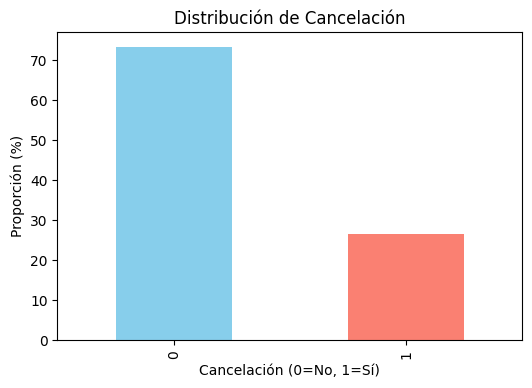

In [448]:
# Conteo de valores en la variable objetivo
conteo = y.value_counts()
print("Conteo por clase:\n", conteo)

# Proporción (porcentaje)
proporcion = y.value_counts(normalize=True) * 100
print("\nProporción por clase (%):\n", proporcion)

# Visualización rápida
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
proporcion.plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribución de Cancelación")
plt.xlabel("Cancelación (0=No, 1=Sí)")
plt.ylabel("Proporción (%)")
plt.show()


# **Balanceos de clases**

La variable objetivo está desbalanceada **(73% no cancelaron vs 27% sí cancelaron).**
Para evitar que el modelo ignore la clase minoritaria (“sí canceló”), aplicamos la técnica **SMOTE**, que genera ejemplos sintéticos de la clase minoritaria.

Con SMOTE **logramos un dataset balanceado** sin perder información ni duplicar registros, lo que mejora la capacidad del modelo para detectar a los clientes que cancelan.

In [449]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Train/test split (estratificado en la variable objetivo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Distribución original en TRAIN:", Counter(y_train))
print("Distribución original en TEST :", Counter(y_test))

# 2. Balanceo con SMOTE en el TRAIN
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución después de SMOTE en TRAIN:", Counter(y_train_res))


Distribución original en TRAIN: Counter({0: 4130, 1: 1495})
Distribución original en TEST : Counter({0: 1033, 1: 374})
Distribución después de SMOTE en TRAIN: Counter({0: 4130, 1: 4130})


# **Normalización o Estandarización**

Algunos algoritmos de machine learning, como **Regresión Logística**, son sensibles a la escala de los datos, realizamos una **estandarización con StandardScaler** para que todas las variables tengan media 0 y desviación estándar 1, osea todas las variables se comparen en la misma unidad y ninguna domine por tener valores más grandes.
Escogimos comenzar con Regresión Logística porque es un modelo sencillo, interpretativo y sirve como línea base para comparar el desempeño de otros algoritmos más complejos.



In [450]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar SOLO con el train resampleado (para no filtrar info del test)
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Shape train escalado:", X_train_scaled.shape)
print("Shape test escalado :", X_test_scaled.shape)



Shape train escalado: (8260, 30)
Shape test escalado : (1407, 30)


# **Análisis de Correlación**

Calculamos la matriz de correlación entre las variables numéricas.
Prestamos especial atención a la relación con la variable objetivo Cancelacion, ya que las variables con mayor correlación pueden ser candidatas clave para los modelos predictivos.

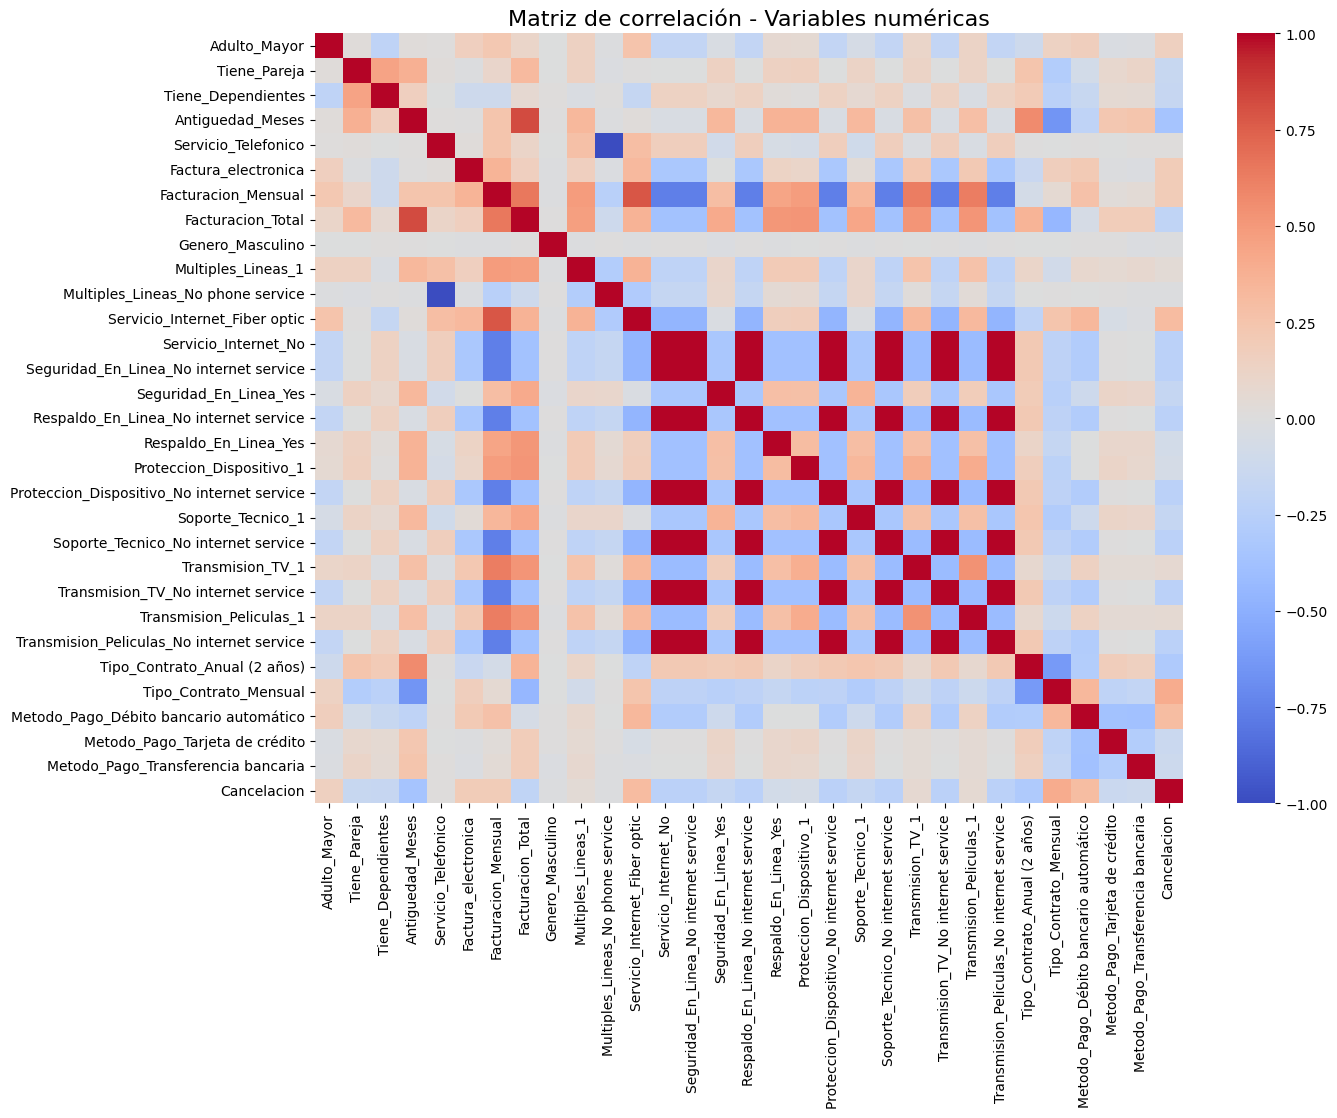

Correlación con Cancelacion:

Cancelacion                                   1.000000
Tipo_Contrato_Mensual                         0.404565
Servicio_Internet_Fiber optic                 0.307463
Metodo_Pago_Débito bancario automático        0.301455
Facturacion_Mensual                           0.192922
Factura_electronica                           0.191454
Adulto_Mayor                                  0.150541
Transmision_TV_1                              0.063254
Transmision_Peliculas_1                       0.060860
Multiples_Lineas_1                            0.040033
Servicio_Telefonico                           0.011691
Genero_Masculino                             -0.008545
Multiples_Lineas_No phone service            -0.011691
Proteccion_Dispositivo_1                     -0.066193
Respaldo_En_Linea_Yes                        -0.082307
Metodo_Pago_Transferencia bancaria           -0.118136
Metodo_Pago_Tarjeta de crédito               -0.134687
Tiene_Pareja                       

In [451]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la variable objetivo al dataframe de features
df_corr = X.copy()
df_corr["Cancelacion"] = y

# Calcular correlación solo para variables numéricas
corr_matrix = df_corr.corr()

# Visualizar mapa de calor
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de correlación - Variables numéricas", fontsize=16)
plt.show()

# Ver correlación con la variable objetivo 'Cancelacion'
corr_target = corr_matrix["Cancelacion"].sort_values(ascending=False)
print("Correlación con Cancelacion:\n")
print(corr_target)



La correlación muestra que los contratos mensuales, el uso de fibra óptica y el pago automático con débito son los factores más asociados a la cancelación.
Por otro lado, una mayor antigüedad y los contratos de dos años se asocian negativamente con la cancelación, sugiriendo que son factores protectores.
Variables como el género o el servicio telefónico no tienen relevancia significativa.

# **Análisis Dirigido**

**Antigüedad vs Cancelación**

Los clientes con menor antigüedad muestran una mayor probabilidad de cancelar el servicio, mientras que los clientes con más meses de permanencia tienden a mantenerse activos. Esto confirma lo que vimos en la correlación, la antigüedad protege contra la cancelación.

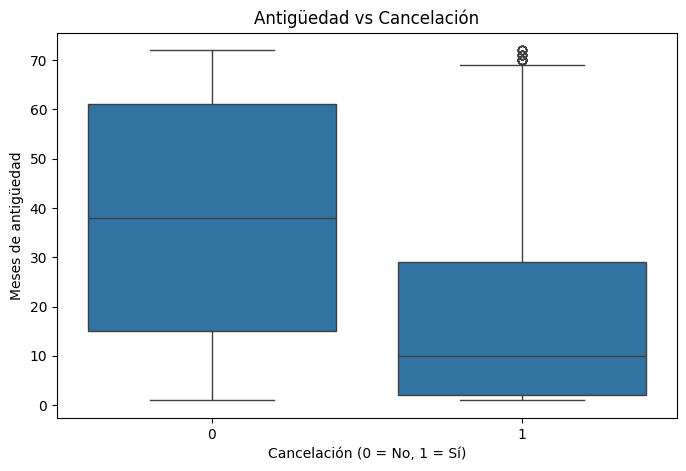

In [452]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelacion", y="Antiguedad_Meses", data=df)
plt.title("Antigüedad vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de antigüedad")
plt.show()


**Facturación Total vs Cancelación**

los clientes con facturación total baja presentan una mayor tasa de cancelación, mientras que quienes acumulan más gasto suelen permanecer más tiempo en la compañía. Esto confirma la correlación negativa que vimos antes (-0.20) a mayor gasto total, menor probabilidad de cancelar

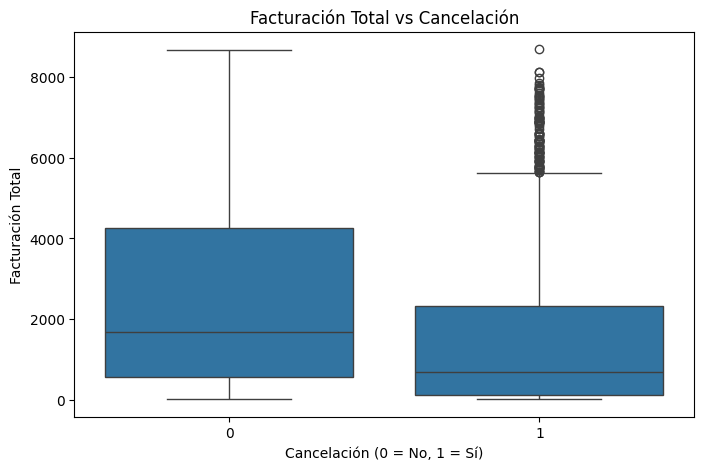

In [453]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelacion", y="Facturacion_Total", data=df)
plt.title("Facturación Total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Facturación Total")
plt.show()



**Tipo de Contrato vs Cancelación**

La mayoría de cancelaciones se concentran en los contratos mensuales, lo que evidencia que los contratos de más largo plazo (1 o 2 años) están asociados con mayor retención de clientes.

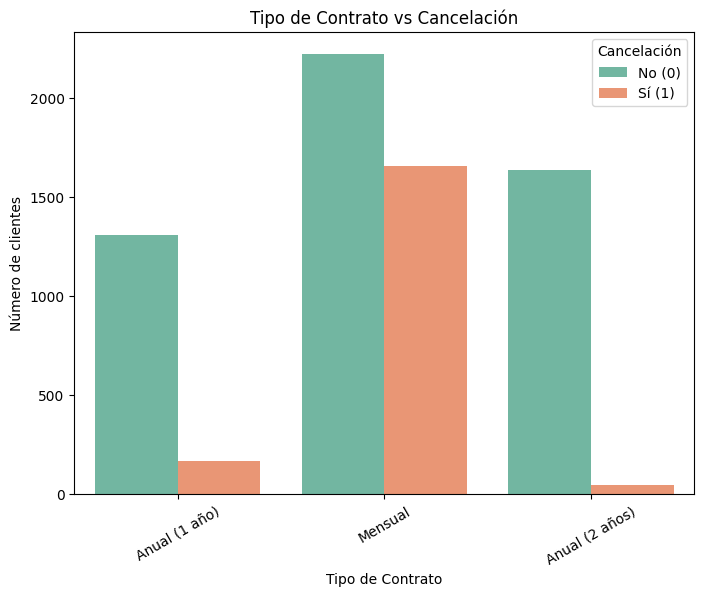

In [454]:

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Tipo_Contrato", hue="Cancelacion", palette="Set2")

plt.title("Tipo de Contrato vs Cancelación")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Número de clientes")
plt.legend(title="Cancelación", labels=["No (0)", "Sí (1)"])
plt.xticks(rotation=30)
plt.show()


**Método de Pago vs Cancelación**

Los clientes que utilizan débito automático presentan una tasa de cancelación más alta, mientras que otros métodos de pago como tarjeta de crédito o transferencia bancaria muestran menor propensión a cancelar

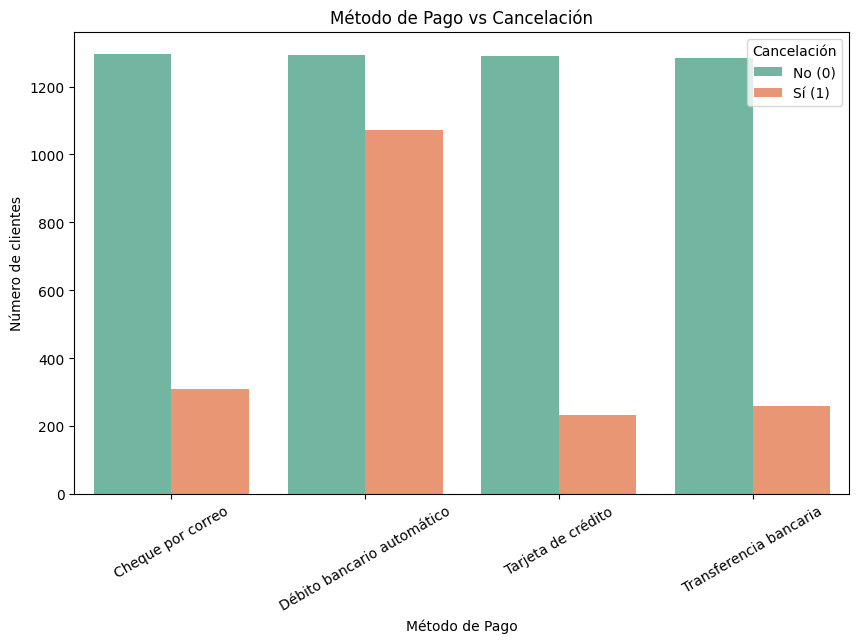

In [455]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Metodo_Pago", hue="Cancelacion", palette="Set2")

plt.title("Método de Pago vs Cancelación")
plt.xlabel("Método de Pago")
plt.ylabel("Número de clientes")
plt.legend(title="Cancelación", labels=["No (0)", "Sí (1)"])
plt.xticks(rotation=30)
plt.show()


# **Creación de modelos**

**Modelo A (con normalización)**: Regresión Logística

**Modelo B (sin normalización)**: Random Forest

# **Separación de datos**



In [456]:
from sklearn.model_selection import train_test_split
from collections import Counter

# División 80% entrenamiento / 20% prueba (estratificada en la variable objetivo)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamaño total:", X.shape[0])
print("Train:", X_train.shape[0], "(", round(X_train.shape[0]/X.shape[0]*100,2), "% )")
print("Test :", X_test.shape[0], "(", round(X_test.shape[0]/X.shape[0]*100,2), "% )")

print("\nDistribución en train:", Counter(y_train))
print("Distribución en test :", Counter(y_test))


Tamaño total: 7032
Train: 5625 ( 79.99 % )
Test : 1407 ( 20.01 % )

Distribución en train: Counter({0: 4130, 1: 1495})
Distribución en test : Counter({0: 1033, 1: 374})


In [457]:

# Crear objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar solo al train
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribución original en train:", Counter(y_train))
print("Distribución balanceada en train:", Counter(y_train_res))
print("Distribución en test (sin tocar):", Counter(y_test))


Distribución original en train: Counter({0: 4130, 1: 1495})
Distribución balanceada en train: Counter({0: 4130, 1: 4130})
Distribución en test (sin tocar): Counter({0: 1033, 1: 374})


In [458]:

# Ajustar SOLO con el train balanceado y transformar
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("Shape train escalado:", X_train_res_scaled.shape)
print("Shape test escalado :", X_test_scaled.shape)


Shape train escalado: (8260, 30)
Shape test escalado : (1407, 30)


**Modelo de Regresión logística (con normalización)**

In [459]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Crear y entrenar modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)

# Predicciones en test (escalado)
y_pred_lr = log_reg.predict(X_test_scaled)
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluación
print("=== Regresión Logística ===")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1-score :", f1_score(y_test, y_pred_lr))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_lr))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr, zero_division=0))


=== Regresión Logística ===
Accuracy : 0.7711442786069652
Precision: 0.5616113744075829
Recall   : 0.6336898395721925
F1-score : 0.5954773869346733
ROC-AUC  : 0.8254008106806922

Matriz de confusión:
[[848 185]
 [137 237]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



**Random forest (Modelo B- Sin Normalización)**

In [460]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar modelo
rf = RandomForestClassifier(
    n_estimators=300,       # número de árboles
    max_depth=None,         # que crezca hasta donde quiera
    random_state=42,
    n_jobs=-1               # usa todos los núcleos disponibles
)
rf.fit(X_train_res, y_train_res)

# Predicciones en test (sin escalar)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Evaluación
print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_rf))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf, zero_division=0))



=== Random Forest ===
Accuracy : 0.7640369580668088
Precision: 0.553030303030303
Recall   : 0.5855614973262032
F1-score : 0.5688311688311688
ROC-AUC  : 0.8131137696652189

Matriz de confusión:
[[856 177]
 [155 219]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.55      0.59      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.77      1407



# **Predicción y evaluación**

In [469]:

# Calcular métricas para ambos modelos
metrics = []

# --- Regresión Logística ---
metrics.append({
    "Modelo": "Regresión Logística",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-score": f1_score(y_test, y_pred_lr),
    "ROC-AUC": roc_auc_score(y_test, y_proba_lr)
})

# --- Random Forest ---
metrics.append({
    "Modelo": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf)
})

# Crear dataframe comparativo
df_results = pd.DataFrame(metrics)
print(df_results)



                Modelo  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Regresión Logística  0.771144   0.561611  0.633690  0.595477  0.825401
1        Random Forest  0.764037   0.553030  0.585561  0.568831  0.813114


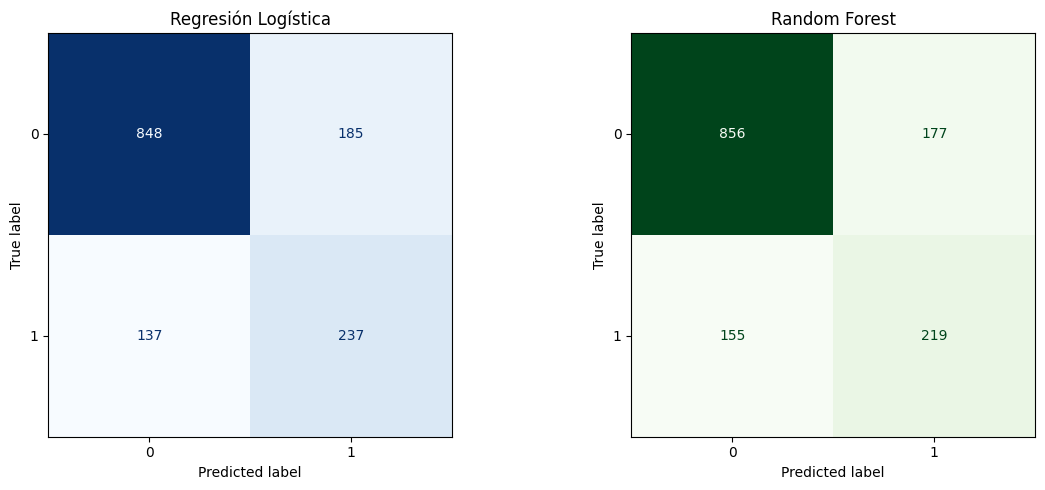

In [468]:

from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# --- Regresión Logística
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test,
                                      cmap="Blues", ax=axes[0], colorbar=False)
axes[0].set_title("Regresión Logística")

# --- Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test,
                                      cmap="Greens", ax=axes[1], colorbar=False)
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()


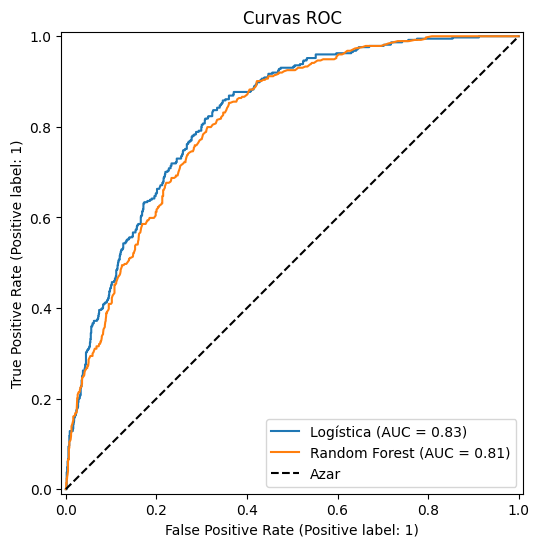

In [463]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(7,6))

# ROC Regresión Logística
RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=plt.gca(), name="Logística")

# ROC Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=plt.gca(), name="Random Forest")

plt.plot([0,1],[0,1],'k--', label="Azar")
plt.title("Curvas ROC")
plt.legend()
plt.show()


In [464]:
import numpy as np

# Extraer nombres de variables después del one-hot
feature_names = X.columns

# Coeficientes del modelo
coefs = log_reg.coef_[0]

# Crear dataframe ordenado por importancia
df_coef = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coefs,
    "Importancia_Abs": np.abs(coefs)
}).sort_values("Importancia_Abs", ascending=False)

print("Top 10 variables más influyentes (Regresión Logística):")
print(df_coef.head(10))


Top 10 variables más influyentes (Regresión Logística):
                             Variable  Coeficiente  Importancia_Abs
6                 Facturacion_Mensual     6.830876         6.830876
4                 Servicio_Telefonico    -2.814111         2.814111
11      Servicio_Internet_Fiber optic    -2.556150         2.556150
3                    Antiguedad_Meses    -1.643420         1.643420
7                   Facturacion_Total     1.251403         1.251403
23            Transmision_Peliculas_1    -1.120801         1.120801
10  Multiples_Lineas_No phone service    -1.092837         1.092837
21                   Transmision_TV_1    -1.056612         1.056612
19                  Soporte_Tecnico_1    -0.832320         0.832320
14             Seguridad_En_Linea_Yes    -0.814153         0.814153


In [465]:
# Importancia de variables en Random Forest
importances = rf.feature_importances_

df_importance = pd.DataFrame({
    "Variable": feature_names,
    "Importancia": importances
}).sort_values("Importancia", ascending=False)

print("Top 10 variables más importantes (Random Forest):")
print(df_importance.head(10))


Top 10 variables más importantes (Random Forest):
                        Variable  Importancia
3               Antiguedad_Meses     0.141068
7              Facturacion_Total     0.139169
6            Facturacion_Mensual     0.109602
14        Seguridad_En_Linea_Yes     0.057334
25  Tipo_Contrato_Anual (2 años)     0.054676
26         Tipo_Contrato_Mensual     0.054369
19             Soporte_Tecnico_1     0.048542
1                   Tiene_Pareja     0.031160
2             Tiene_Dependientes     0.030750
16         Respaldo_En_Linea_Yes     0.027234


# Informe de Resultados — Predicción de Cancelación

## 1) Resumen ejecutivo
- **Objetivo:** predecir la cancelación de clientes y extraer factores clave para diseñar estrategias de retención.  
- **Modelos evaluados:** Regresión Logística (datos escalados) y Random Forest (sin escalar), con **SMOTE** aplicado solo al *train*.  
- **Resultado global:** la **Regresión Logística** rindió mejor en recall, F1 y ROC-AUC, por lo que se recomienda como **línea base**.  

### Métricas en test
| Modelo               | Accuracy | Precisión | Recall | F1-score | ROC-AUC |
|----------------------|----------|-----------|--------|----------|---------|
| **Regresión Logística** | **0.771** | **0.562** | **0.634** | **0.595** | **0.825** |
| Random Forest        | 0.764    | 0.553     | 0.586  | 0.569    | 0.813   |

> La **Regresión Logística** presenta mejor Recall, F1 y ROC-AUC en este conjunto de prueba.  

---

## 2) Variables más influyentes

### Regresión Logística — Top 10 por |coeficiente|
1. Facturación Mensual (+) → más alta, mayor probabilidad de churn.  
2. Servicio Telefónico (–) → reduce cancelación.  
3. Internet Fibra Óptica (–) → reduce cancelación.  
4. Antigüedad en meses (–) → clientes más antiguos se quedan.  
5. Facturación Total (+) → mayor gasto acumulado, mayor churn.  
6. Transmisión de Películas (–) → retiene clientes.  
7. Transmisión de TV (–) → retiene clientes.  
8. Soporte Técnico (–) → retiene clientes.  
9. Seguridad en Línea (–) → retiene clientes.  

### Random Forest — Top 10 por importancia
1. Antigüedad en meses  
2. Facturación Total  
3. Facturación Mensual  
4. Seguridad en Línea  
5. Tipo de Contrato (anual/mensual)  
6. Soporte Técnico  
7. Pareja / Dependientes  
8. Respaldo en Línea  

---

## 3) Conclusiones y recomendaciones
- **Mayor riesgo de cancelación:** clientes con **factura alta**, **baja antigüedad**, **contrato mensual** y sin servicios extra.  
- **Menor riesgo:** clientes con **fibra óptica**, contrato **anual**, y que usan servicios adicionales (TV, películas, seguridad, soporte).  

### Estrategias sugeridas
- **Precio y valor percibido:** ofrecer planes más ajustados o descuentos a clientes con facturas altas.  
- **Onboarding (0–90 días):** contacto proactivo temprano para clientes nuevos.  
- **Migración de contrato:** incentivar el pase a contrato anual con beneficios.  
- **Servicios complementarios:** incluir seguridad en línea, soporte y TV/películas como valor agregado.  
- **Soporte prioritario:** ruta rápida para clientes en riesgo.  

---

## 4) Conclusión final
Los factores más determinantes son **precio (facturación)**, **antigüedad** y **tipo de contrato**.  
El modelo recomendado como línea base es **Regresión Logística**, por su mayor recall y ROC-AUC.  
Aplicando las estrategias propuestas, la empresa puede reducir significativamente el churn en segmentos de mayor riesgo.
